In [1]:
# import basic libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
df=pd.read_csv('Cardio_vascular.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape

(1025, 14)

In [4]:
# change name of columns
df.rename(columns={"sex":"gender","cp":"rest_cp","trestbps":"rest_bp","chol":"cholesterol","fbs":"fast_bloodsugar",
                   "restecg":"rest_ecg","thalach":"stress_HR","exang":"Exercise_cp","oldpeak":"STdepression_Exerc",
                   "slope":"STpeak_exerc","ca":"coloured_vessels","thal":"thalassmia","target":"heart_disease"},inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1025 non-null   int64  
 1   gender              1025 non-null   int64  
 2   rest_cp             1025 non-null   int64  
 3   rest_bp             1025 non-null   int64  
 4   cholesterol         1025 non-null   int64  
 5   fast_bloodsugar     1025 non-null   int64  
 6   rest_ecg            1025 non-null   int64  
 7   stress_HR           1025 non-null   int64  
 8   Exercise_cp         1025 non-null   int64  
 9   STdepression_Exerc  1025 non-null   float64
 10  STpeak_exerc        1025 non-null   int64  
 11  coloured_vessels    1025 non-null   int64  
 12  thalassmia          1025 non-null   int64  
 13  heart_disease       1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.436098,9.071551,29.0,48.0,56.0,61.0,77.0
gender,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
rest_cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
rest_bp,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
cholesterol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fast_bloodsugar,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
rest_ecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
stress_HR,1025.0,149.141463,22.990115,71.0,132.0,152.0,166.0,202.0
Exercise_cp,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
STdepression_Exerc,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [7]:
# Check for normal distribution
skewness1= df.skew()
skewness1

age                  -0.249478
gender               -0.851449
rest_cp               0.529455
rest_bp               0.739768
cholesterol           1.074073
fast_bloodsugar       1.971339
rest_ecg              0.180440
stress_HR            -0.516791
Exercise_cp           0.692655
STdepression_Exerc    1.210899
STpeak_exerc         -0.479134
coloured_vessels      1.261189
thalassmia           -0.524390
heart_disease        -0.052778
dtype: float64

All values are between -3 to 3. Thus, it can be considered as normal distribution.

In [8]:
kurtosis1= df.kurt()
kurtosis1

age                  -0.524644
gender               -1.277531
rest_cp              -1.149500
rest_bp               0.991221
cholesterol           3.996803
fast_bloodsugar       1.889859
rest_ecg             -1.309614
stress_HR            -0.080328
Exercise_cp          -1.523205
STdepression_Exerc    1.314471
STpeak_exerc         -0.647129
coloured_vessels      0.701123
thalassmia            0.250827
heart_disease        -2.001123
dtype: float64

All values are between -3 to 3. Thus, it can be considered as normal distribution.

In [9]:
df.isnull().sum()

age                   0
gender                0
rest_cp               0
rest_bp               0
cholesterol           0
fast_bloodsugar       0
rest_ecg              0
stress_HR             0
Exercise_cp           0
STdepression_Exerc    0
STpeak_exerc          0
coloured_vessels      0
thalassmia            0
heart_disease         0
dtype: int64

In [10]:
#Visualize variables
df.heart_disease.value_counts()

1    526
0    499
Name: heart_disease, dtype: int64

526 persons have Cardio vascular disease and 499 persons don't have Cardio vascular disease.

[Text(0.5, 0, 'gender of patient')]

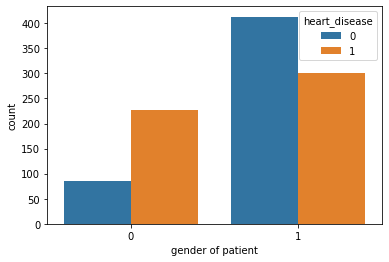

In [11]:
# Study data genderwise
gender_count= sns.countplot(x='gender', data=df, hue='heart_disease')
gender_count.set(xlabel='gender of patient')

On X axis, 0: Female and 1: Male. Female have less chance of cardio vascular disease.

In [12]:
df.gender.value_counts()

1    713
0    312
Name: gender, dtype: int64

<AxesSubplot:xlabel='heart_disease', ylabel='age'>

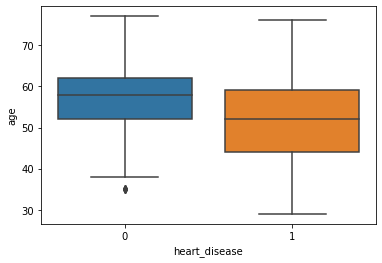

In [13]:
# Study outliers
sns.boxplot(data=df, x='heart_disease', y='age')

<AxesSubplot:>

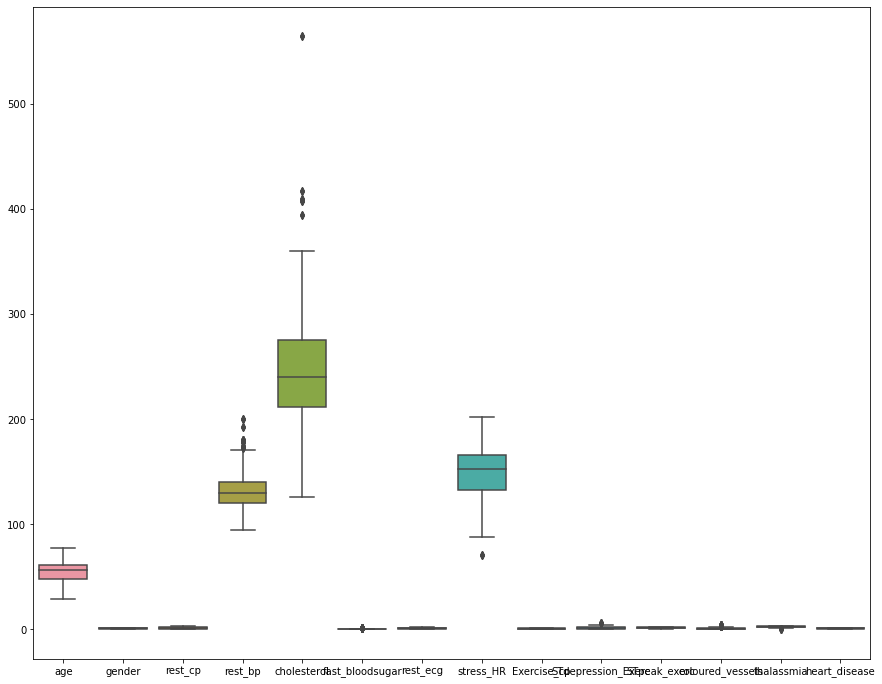

In [14]:
"""
Treat outlier:
Not required- Tree-based algorithms
Required- KNN, SVM
"""
plt.figure(figsize=(15,12))
sns.boxplot(data=df)

In [15]:
# Floor capping option is here used for outlier treatment.

# For rest_bp
Q1_rest_bp=df['rest_bp'].quantile(0.25)
Q3_rest_bp=df['rest_bp'].quantile(0.75)
IQR1=Q3_rest_bp-Q1_rest_bp
upper_limit_rest_bp=(Q3_rest_bp+1.5*IQR1)
lower_limit_rest_bp=(Q1_rest_bp-1.5*IQR1)
print('upper_limit_rest_bp', upper_limit_rest_bp)
print('lower_limit_rest_bp', lower_limit_rest_bp)

# For stress_HR
Q1_stress_HR=df['stress_HR'].quantile(0.25)
Q3_stress_HR=df['stress_HR'].quantile(0.75)
IQR2=Q3_stress_HR-Q1_stress_HR
upper_limit_stress_HR=(Q3_stress_HR+1.5*IQR2)
lower_limit_stress_HR=(Q1_stress_HR-1.5*IQR2)
print('upper_limit_stress_HR', upper_limit_stress_HR)
print('lower_limit_stress_HR', lower_limit_stress_HR)

# For cholesterol
Q1_cholesterol=df['cholesterol'].quantile(0.25)
Q3_cholesterol=df['cholesterol'].quantile(0.75)
IQR3=Q3_cholesterol-Q1_cholesterol
upper_limit_cholesterol=(Q3_cholesterol+1.5*IQR3)
lower_limit_cholesterol=(Q1_cholesterol-1.5*IQR3)
print('upper_limit_cholesterol', upper_limit_cholesterol)
print('lower_limit_cholesterol', lower_limit_cholesterol)

upper_limit_rest_bp 170.0
lower_limit_rest_bp 90.0
upper_limit_stress_HR 217.0
lower_limit_stress_HR 81.0
upper_limit_cholesterol 371.0
lower_limit_cholesterol 115.0


In [16]:
df['rest_bp']=np.where(df['rest_bp']>upper_limit_rest_bp, upper_limit_rest_bp, np.where(df['rest_bp']<lower_limit_rest_bp, lower_limit_rest_bp, df['rest_bp']))
df['stress_HR']=np.where(df['stress_HR']>upper_limit_stress_HR, upper_limit_stress_HR, np.where(df['stress_HR']<lower_limit_stress_HR, lower_limit_stress_HR, df['stress_HR']))
df['cholesterol']=np.where(df['cholesterol']>upper_limit_cholesterol, upper_limit_cholesterol, np.where(df['cholesterol']<lower_limit_cholesterol, lower_limit_cholesterol, df['cholesterol']))

In [17]:
# Split the data into x and y
x=df.drop(['heart_disease'], axis=1)
y=df['heart_disease']

In [18]:
# Feature selection 
# Using Chi-square statistical test
# select 12 most significant feature
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures= SelectKBest(score_func=chi2, k=13)
fit=bestfeatures.fit(x,y)
dfscores= pd.DataFrame(fit.scores_)
dfcolumns= pd.DataFrame(x.columns)

# Concat 2 dataframes for better visualization
featurescores= pd.concat([dfcolumns, dfscores], axis=1)
featurescores.columns= ['Features', 'Score']
print(featurescores.nlargest(12, 'Score'))

              Features       Score
7            stress_HR  640.649524
9   STdepression_Exerc  253.653461
2              rest_cp  217.823922
11    coloured_vessels  210.625919
4          cholesterol  133.252562
8          Exercise_cp  130.470927
0                  age   81.273689
3              rest_bp   37.320931
10        STpeak_exerc   33.673948
1               gender   24.373650
12          thalassmia   19.373465
6             rest_ecg    9.739343


In [19]:
#Multi collinearity 

In [20]:
x.corr()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
age,1.000000,-0.103574,-0.071960,0.278055,0.213494,0.121163,-0.132515,-0.390618,0.088017,0.208159,-0.168905,0.271415,0.072191
gender,-0.103574,1.000000,-0.041119,-0.067713,-0.181965,0.027200,-0.055117,-0.047748,0.139157,0.084687,-0.026666,0.111729,0.198424
rest_cp,-0.071960,-0.041119,1.000000,0.047868,-0.097159,0.079294,0.043581,0.306063,-0.401513,-0.174733,0.131633,-0.176206,-0.163341
rest_bp,0.278055,-0.067713,0.047868,1.000000,0.135275,0.170346,-0.127729,-0.043414,0.046996,0.177781,-0.110336,0.105135,0.047446
cholesterol,0.213494,-0.181965,-0.097159,0.135275,1.000000,0.030109,-0.137856,-0.030446,0.083081,0.056294,-0.006644,0.080030,0.091881
fast_bloodsugar,0.121163,0.027200,0.079294,0.170346,0.030109,1.000000,-0.104051,-0.010136,0.049261,0.010859,-0.061902,0.137156,-0.042177
rest_ecg,-0.132515,-0.055117,0.043581,-0.127729,-0.137856,-0.104051,1.000000,0.051295,-0.065606,-0.050114,0.086086,-0.078072,-0.020504
stress_HR,-0.390618,-0.047748,0.306063,-0.043414,-0.030446,-0.010136,0.051295,1.000000,-0.382152,-0.348862,0.395921,-0.207808,-0.098259
Exercise_cp,0.088017,0.139157,-0.401513,0.046996,0.083081,0.049261,-0.065606,-0.382152,1.000000,0.310844,-0.267335,0.107849,0.197201
STdepression_Exerc,0.208159,0.084687,-0.174733,0.177781,0.056294,0.010859,-0.050114,-0.348862,0.310844,1.000000,-0.575189,0.221816,0.202672


In [21]:
df.corr()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia,heart_disease
age,1.000000,-0.103574,-0.071960,0.278055,0.213494,0.121163,-0.132515,-0.390618,0.088017,0.208159,-0.168905,0.271415,0.072191,-0.229133
gender,-0.103574,1.000000,-0.041119,-0.067713,-0.181965,0.027200,-0.055117,-0.047748,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
rest_cp,-0.071960,-0.041119,1.000000,0.047868,-0.097159,0.079294,0.043581,0.306063,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
rest_bp,0.278055,-0.067713,0.047868,1.000000,0.135275,0.170346,-0.127729,-0.043414,0.046996,0.177781,-0.110336,0.105135,0.047446,-0.132301
cholesterol,0.213494,-0.181965,-0.097159,0.135275,1.000000,0.030109,-0.137856,-0.030446,0.083081,0.056294,-0.006644,0.080030,0.091881,-0.118254
fast_bloodsugar,0.121163,0.027200,0.079294,0.170346,0.030109,1.000000,-0.104051,-0.010136,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
rest_ecg,-0.132515,-0.055117,0.043581,-0.127729,-0.137856,-0.104051,1.000000,0.051295,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
stress_HR,-0.390618,-0.047748,0.306063,-0.043414,-0.030446,-0.010136,0.051295,1.000000,-0.382152,-0.348862,0.395921,-0.207808,-0.098259,0.422509
Exercise_cp,0.088017,0.139157,-0.401513,0.046996,0.083081,0.049261,-0.065606,-0.382152,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
STdepression_Exerc,0.208159,0.084687,-0.174733,0.177781,0.056294,0.010859,-0.050114,-0.348862,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


rest_cp and stress_HR are correlated with target variable.

In [22]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=12)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(717, 13) (308, 13) (717,) (308,)


In [23]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled_= scaler.fit_transform(x_train)
x_test_scaled_= scaler.fit_transform(x_test)

# 1) KNN Model

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_s_5= KNeighborsClassifier(n_neighbors=5)
knn_s_5.fit(x_train_scaled_, y_train)

y_pred_knn_train= knn_s_5.predict(x_train_scaled_)
y_pred_knn_test= knn_s_5.predict(x_test_scaled_)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('KNN Train Accuracy', accuracy_score(y_train, y_pred_knn_train))
print('KNN Test Accuracy', accuracy_score(y_test, y_pred_knn_test))

KNN Train Accuracy 0.9344490934449093
KNN Test Accuracy 0.8538961038961039


Overfitting issue, still difference between both accuracies is less than 10%.

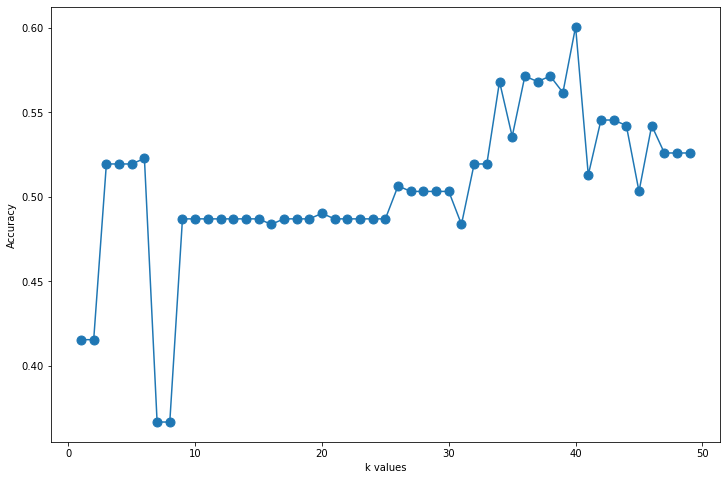

In [26]:
# find more effective value of n_neighbours
accuracy_K=[]
for k in range(1,50):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled_, y_train)
    y_pred= knn.predict(x_test)
    accuracy= accuracy_score(y_pred, y_pred_knn_test)
    accuracy_K.append(accuracy)
    
plt.figure(figsize=(12,8))
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.plot(range(1,50), accuracy_K, marker='o', markersize=9)

In [27]:
# Cross validation
from sklearn.model_selection import cross_val_score
accuracy_training= cross_val_score(knn_s_5, x_train_scaled_, y_train, cv=20)
accuracy_testing= cross_val_score(knn_s_5, x_test_scaled_, y_test, cv=20)

print(accuracy_training)
print('........................................................')
print(accuracy_testing)

[0.91666667 0.80555556 0.83333333 0.91666667 0.80555556 0.80555556
 0.83333333 0.80555556 0.75       0.91666667 0.80555556 0.91666667
 0.75       0.88888889 0.86111111 0.83333333 0.94444444 0.82857143
 0.82857143 0.91428571]
........................................................
[0.875      0.9375     0.875      1.         0.8125     0.9375
 0.875      0.5        1.         0.73333333 0.73333333 0.86666667
 0.8        0.86666667 0.73333333 0.66666667 0.73333333 0.73333333
 0.93333333 0.8       ]


In [28]:
# Evaluation Metrics
# Confustion matrix

knn_conf_mat= confusion_matrix(y_test, y_pred_knn_test)
print(knn_conf_mat)

[[130  17]
 [ 28 133]]


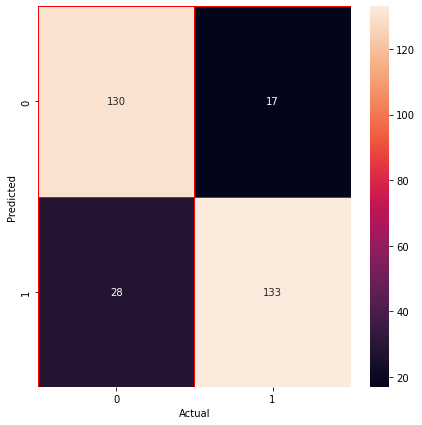

In [29]:
# Plot confusion matrix
plt.subplots(figsize=(7,7))
sns.heatmap(knn_conf_mat, annot=True, linewidths=0.5, linecolor= 'red', fmt='.0f', data=x)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

X axis= actul (0 and 1, Left to right),
Y axis= predicted (0 and 1, Top to bottom),
TN= 130,
FP= 17,
FN= 28,
TP= 133.

Type I error: FP,
Type II erro: FN

In [30]:
# Classification report
print('Classification report for KNN model on Training data')
print(classification_report(y_train, y_pred_knn_train))

print('...................................................')

print('Classification report for KNN model on Training data')
print(classification_report(y_test, y_pred_knn_test))

Classification report for KNN model on Training data
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       352
           1       0.95      0.92      0.93       365

    accuracy                           0.93       717
   macro avg       0.93      0.93      0.93       717
weighted avg       0.94      0.93      0.93       717

...................................................
Classification report for KNN model on Training data
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       147
           1       0.89      0.83      0.86       161

    accuracy                           0.85       308
   macro avg       0.85      0.86      0.85       308
weighted avg       0.86      0.85      0.85       308



In [31]:
# ROC AUC 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# predict probabilities
probability_prediction_positive= knn.predict_proba(x_test)[:,1]

# auc score
auc_score= roc_auc_score(y_test, probability_prediction_positive)

# roc curve for models
fpr, tpr, thresh= roc_curve(y_test, probability_prediction_positive, pos_label=1)

print('AUC Score:', auc_score)

AUC Score: 0.6437444543034605


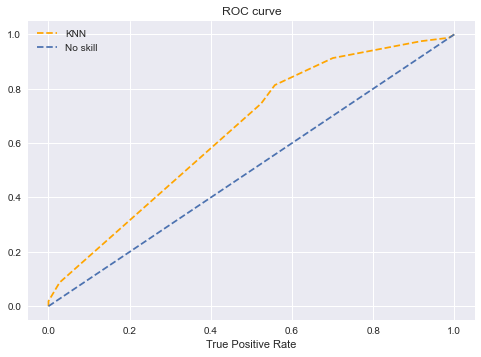

In [32]:
# Plot AUC curve

plt.style.use('seaborn')

# plot roc curve
plt.plot(fpr, tpr, linestyle='--', color='orange', label='KNN')

# plot no skill roc curve
plt.plot([0,1], [0,1], linestyle='--', label='No skill')

# title
plt.title('ROC curve')

# x label and y label
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

# 2) SVM model

In [33]:
from sklearn.svm import SVC

svm= SVC(C=.1, kernel='linear', gamma=1, probability=True)
svm.fit(x_train_scaled_, y_train)
y_pred_svm_train=svm.predict(x_train_scaled_)
y_pred_svm_test=svm.predict(x_test_scaled_)

print('Train accuracy', svm.score(x_train_scaled_, y_train))
print('Test accuracy', svm.score(x_test, y_test))

Train accuracy 0.8675034867503487
Test accuracy 0.6461038961038961


In [34]:
# Confusion matrix
svm_conf_mat= confusion_matrix(y_test, y_pred_svm_test)
print(svm_conf_mat)

[[113  34]
 [ 18 143]]


In [35]:
# Classification report
print('Classification report for SVM model on Training data')
print(classification_report(y_train, y_pred_svm_train))

print('...................................................')

print('Classification report for SVM model on Training data')
print(classification_report(y_test, y_pred_svm_test))

Classification report for SVM model on Training data
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       352
           1       0.83      0.93      0.88       365

    accuracy                           0.87       717
   macro avg       0.87      0.87      0.87       717
weighted avg       0.87      0.87      0.87       717

...................................................
Classification report for SVM model on Training data
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       147
           1       0.81      0.89      0.85       161

    accuracy                           0.83       308
   macro avg       0.84      0.83      0.83       308
weighted avg       0.83      0.83      0.83       308



In [36]:
# ROC AUC 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# predict probabilities
probability_prediction_positive2= svm.predict_proba(x_test)[:,1]

# auc score
auc_score= roc_auc_score(y_test, probability_prediction_positive2)

# roc curve for models
fpr, tpr, thresh= roc_curve(y_test, probability_prediction_positive2, pos_label=1)

print('AUC Score:', auc_score)

AUC Score: 0.7664258249883805


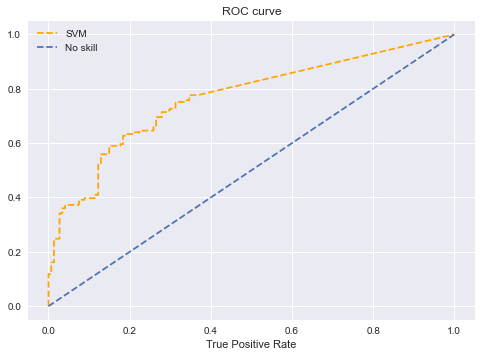

In [37]:
# Plot AUC curve

plt.style.use('seaborn')

# plot roc curve
plt.plot(fpr, tpr, linestyle='--', color='orange', label='SVM')

# plot no skill roc curve
plt.plot([0,1], [0,1], linestyle='--', label='No skill')

# title
plt.title('ROC curve')

# x label and y label
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

# 3) Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=200)
lr.fit(x_train_scaled_, y_train)

LogisticRegression(max_iter=200)

In [39]:
y_pred_lr_train=lr.predict(x_train_scaled_)
y_pred_lr_test=lr.predict(x_test_scaled_)

print('Train accuracy', accuracy_score(y_train, y_pred_lr_train))
print('Test accuracy', accuracy_score(y_test, y_pred_lr_test))

Train accuracy 0.8758716875871687
Test accuracy 0.8246753246753247


In [40]:
# Confusion matrix
lr_conf_mat= confusion_matrix(y_test, y_pred_lr_test)
print(lr_conf_mat)

[[117  30]
 [ 24 137]]


In [41]:
# Classification report
print('Classification report for LR model on Training data')
print(classification_report(y_train, y_pred_lr_train))

print('...................................................')

print('Classification report for LR model on Training data')
print(classification_report(y_test, y_pred_lr_test))

Classification report for LR model on Training data
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       352
           1       0.85      0.92      0.88       365

    accuracy                           0.88       717
   macro avg       0.88      0.88      0.88       717
weighted avg       0.88      0.88      0.88       717

...................................................
Classification report for LR model on Training data
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       147
           1       0.82      0.85      0.84       161

    accuracy                           0.82       308
   macro avg       0.83      0.82      0.82       308
weighted avg       0.82      0.82      0.82       308



# 4) Decision Tree

Criteria: Entropy

In [42]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [43]:
y_pred_dt_train=dt.predict(x_train)
y_pred_dt_test=dt.predict(x_test)

print('Train accuracy', accuracy_score(y_train, y_pred_dt_train))
print('Test accuracy', accuracy_score(y_test, y_pred_dt_test))

Train accuracy 1.0
Test accuracy 1.0


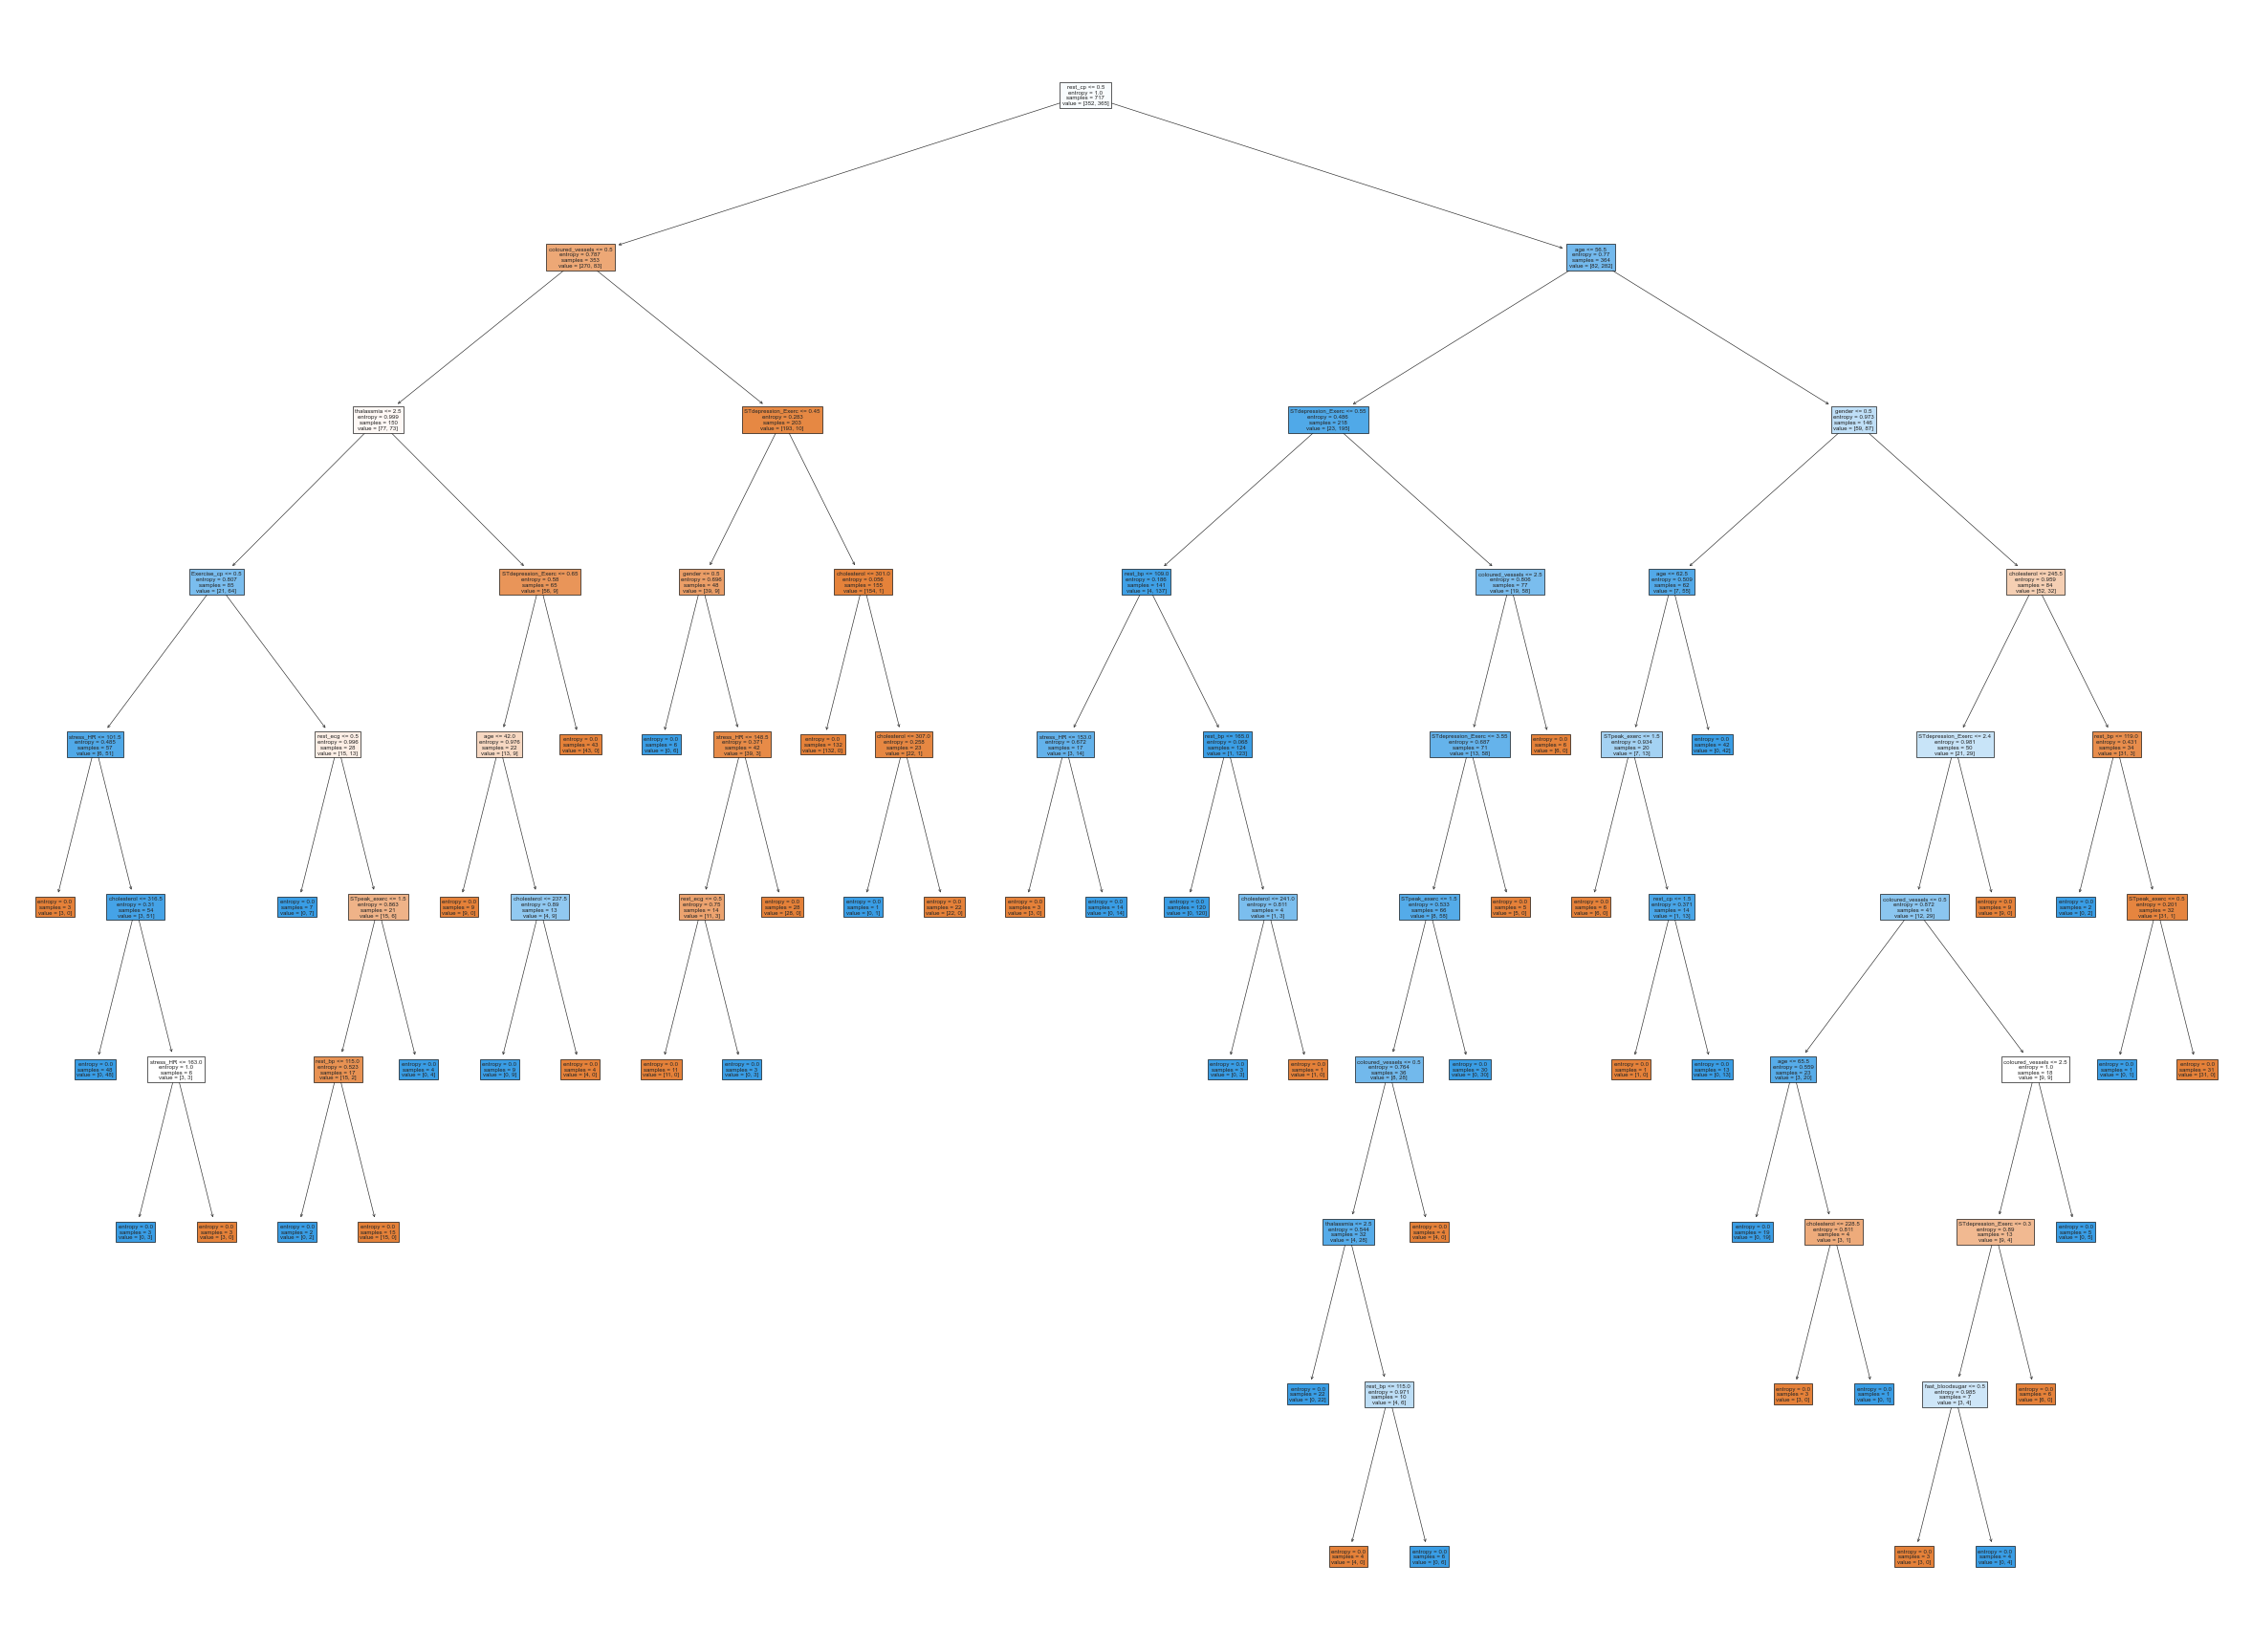

In [44]:
# Plot Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15), dpi=150)
plot_tree(dt, filled=True, feature_names=x.columns)
plt.show()

For overfitted model like this, Prunning is required.

In [45]:
def report_model(model):
    model_preds=model.predict(x_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(12,8), dpi=150)
    plot_tree(model, filled=True, feature_names=x.columns)

In [46]:
pruned_tree= DecisionTreeClassifier(max_depth=1)
pruned_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1)

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       147
           1       0.74      0.76      0.75       161

    accuracy                           0.74       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.74      0.74      0.74       308





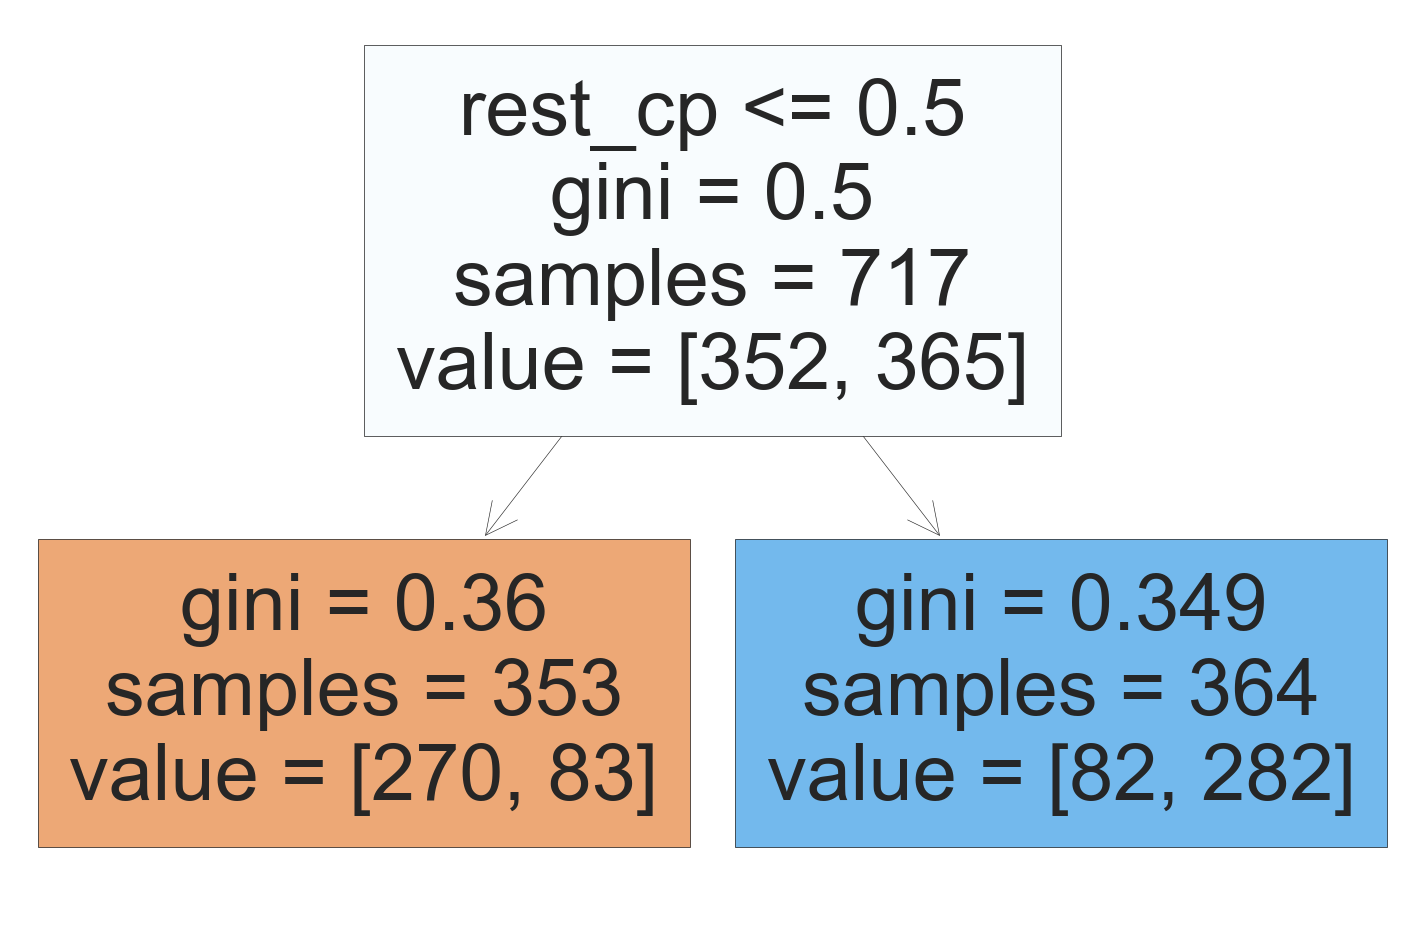

In [47]:
report_model(pruned_tree)

In [48]:
pruned_tree5= DecisionTreeClassifier(max_depth=5)
pruned_tree5.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       147
           1       0.85      0.97      0.90       161

    accuracy                           0.89       308
   macro avg       0.90      0.89      0.89       308
weighted avg       0.90      0.89      0.89       308





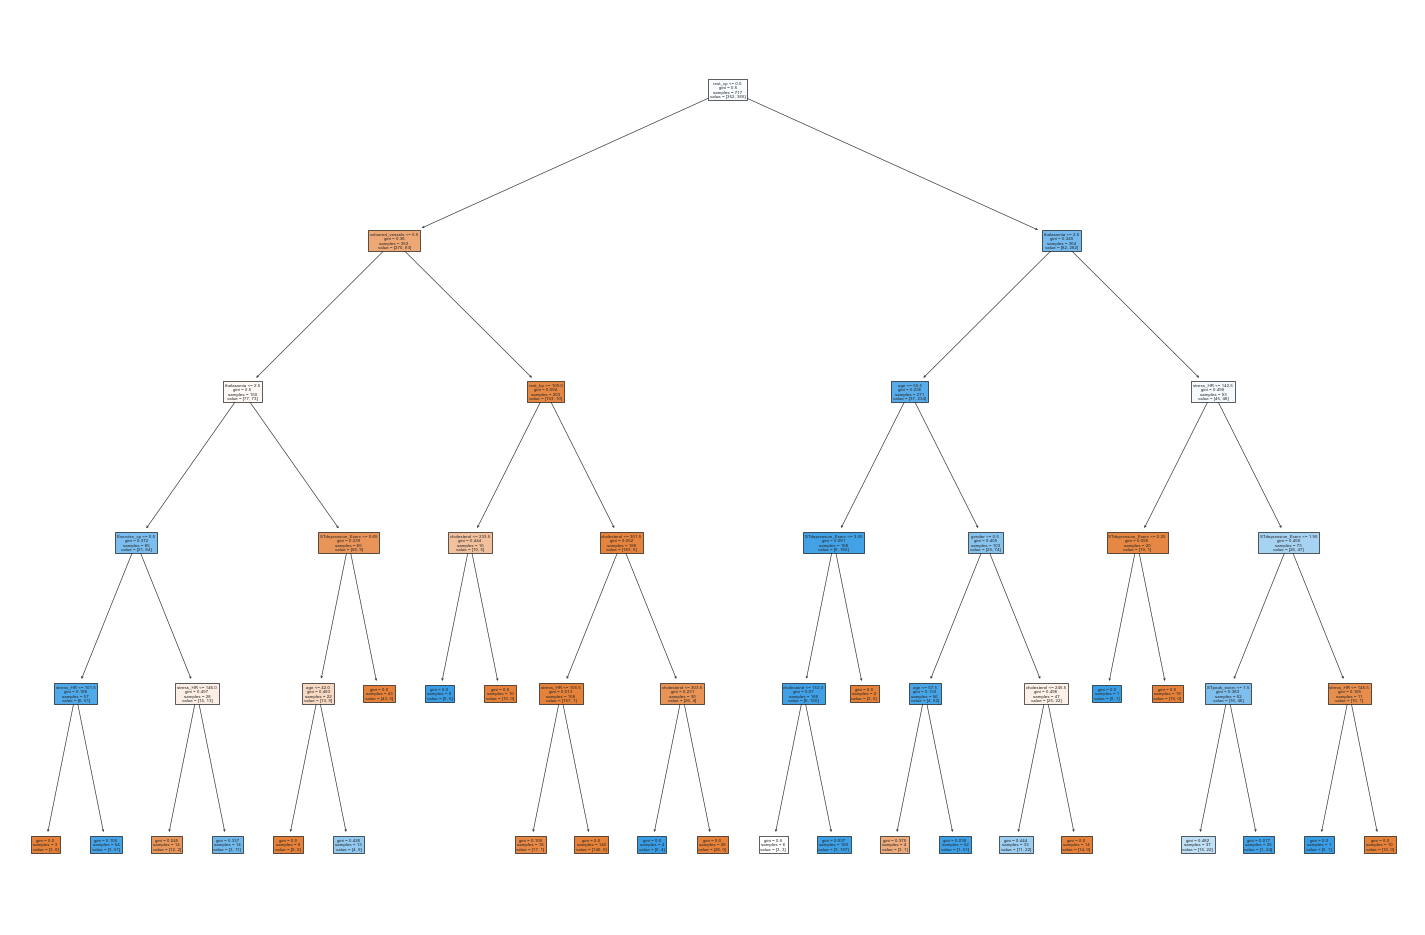

In [49]:
report_model(pruned_tree5)

In [50]:
# Confusion matrix
dt_conf_mat= confusion_matrix(y_test, y_pred_dt_test)
print(dt_conf_mat)

[[147   0]
 [  0 161]]


In [51]:
# Classification report
print('Classification report for DT model on Training data')
print(classification_report(y_train, y_pred_dt_train))

print('...................................................')

print('Classification report for DT model on Training data')
print(classification_report(y_test, y_pred_dt_test))

Classification report for DT model on Training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       352
           1       1.00      1.00      1.00       365

    accuracy                           1.00       717
   macro avg       1.00      1.00      1.00       717
weighted avg       1.00      1.00      1.00       717

...................................................
Classification report for DT model on Training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       161

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



In [52]:
# ROC AUC 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# predict probabilities
probability_prediction_positive3= dt.predict_proba(x_test)[:,1]

# auc score
auc_score= roc_auc_score(y_test, probability_prediction_positive3)

# roc curve for models
fpr, tpr, thresh= roc_curve(y_test, probability_prediction_positive3, pos_label=1)

print('AUC Score:', auc_score)

AUC Score: 1.0


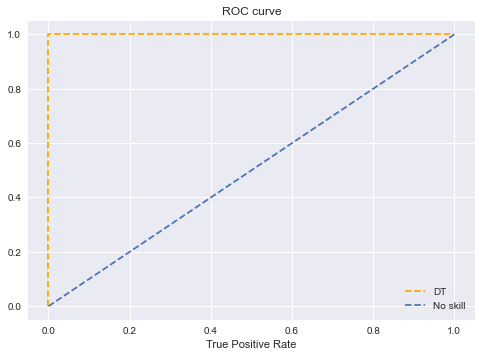

In [53]:
# Plot AUC curve

plt.style.use('seaborn')

# plot roc curve
plt.plot(fpr, tpr, linestyle='--', color='orange', label='DT')

# plot no skill roc curve
plt.plot([0,1], [0,1], linestyle='--', label='No skill')

# title
plt.title('ROC curve')

# x label and y label
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

In [54]:
# Feature importance
dt.feature_importances_

array([0.08986966, 0.06677049, 0.22893448, 0.05354699, 0.07577314,
       0.00962097, 0.02827123, 0.04670892, 0.01812346, 0.11282347,
       0.05133965, 0.14660317, 0.07161438])

In [55]:
pd.DataFrame(index=x.columns, data= dt.feature_importances_, columns=['Feature Importance'])

,Feature Importance
age,0.089870
gender,0.066770
rest_cp,0.228934
rest_bp,0.053547
cholesterol,0.075773
fast_bloodsugar,0.009621
rest_ecg,0.028271
stress_HR,0.046709
Exercise_cp,0.018123
STdepression_Exerc,0.112823


rest_cp, STdepression_Exerc, and coloured_vessels get higher feature importance.

# 5) Bagging model

In [56]:
from sklearn.ensemble import BaggingClassifier

bagging= BaggingClassifier()
bagging.fit(x_train, y_train)

BaggingClassifier()

In [57]:
y_pred_bm_train=dt.predict(x_train)
y_pred_bm_test=dt.predict(x_test)

print('Train accuracy', accuracy_score(y_train, y_pred_bm_train))
print('Test accuracy', accuracy_score(y_test, y_pred_bm_test))

Train accuracy 1.0
Test accuracy 1.0


In [58]:
# Classification report
print('Classification report for Bagging model on Training data')
print(classification_report(y_train, y_pred_bm_train))

print('...................................................')

print('Classification report for Bagging model on Training data')
print(classification_report(y_test, y_pred_bm_test))

Classification report for Bagging model on Training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       352
           1       1.00      1.00      1.00       365

    accuracy                           1.00       717
   macro avg       1.00      1.00      1.00       717
weighted avg       1.00      1.00      1.00       717

...................................................
Classification report for Bagging model on Training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       161

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



In [59]:
# Confusion matrix
bm_conf_mat= confusion_matrix(y_test, y_pred_bm_test)
print(bm_conf_mat)

[[147   0]
 [  0 161]]


Mostly used algorithms for Classification RF, SVM, and For less data use KNN.

# 6) Random Forest

Criteria: Entropy

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=50, criterion='entropy')

In [61]:
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [62]:
y_pred_rf_train=rf.predict(x_train)
y_pred_rf_test=rf.predict(x_test)

print('Train accuracy', accuracy_score(y_train, y_pred_rf_train))
print('Test accuracy', accuracy_score(y_test, y_pred_rf_test))

Train accuracy 1.0
Test accuracy 0.987012987012987


In [63]:
# Confusion matrix
rf_conf_mat= confusion_matrix(y_test, y_pred_rf_test)
print(rf_conf_mat)

[[143   4]
 [  0 161]]


In [64]:
# Classification report
print('Classification report for RF model on Training data')
print(classification_report(y_train, y_pred_rf_train))

print('...................................................')

print('Classification report for RF model on Training data')
print(classification_report(y_test, y_pred_rf_test))

Classification report for RF model on Training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       352
           1       1.00      1.00      1.00       365

    accuracy                           1.00       717
   macro avg       1.00      1.00      1.00       717
weighted avg       1.00      1.00      1.00       717

...................................................
Classification report for RF model on Training data
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       147
           1       0.98      1.00      0.99       161

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [65]:
# Get feature importance
rf.feature_importances_
pd.DataFrame(index=x.columns, data= rf.feature_importances_, columns=['Feature Importance'])

,Feature Importance
age,0.096644
gender,0.043944
rest_cp,0.122811
rest_bp,0.068265
cholesterol,0.080836
fast_bloodsugar,0.010134
rest_ecg,0.019802
stress_HR,0.123102
Exercise_cp,0.056997
STdepression_Exerc,0.097141


rest_cp, stress_HR, and coloured_vessels get higher feature importance.

# 7) Random Forest 

Criteria: Gini

In [66]:
rf_gini= RandomForestClassifier(n_estimators=50, criterion='gini')

In [67]:
rf_gini.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [68]:
y_pred_rf_gini_train=rf_gini.predict(x_train)
y_pred_rf_gini_test=rf_gini.predict(x_test)

print('Train accuracy', accuracy_score(y_train, y_pred_rf_train))
print('Test accuracy', accuracy_score(y_test, y_pred_rf_test))

Train accuracy 1.0
Test accuracy 0.987012987012987


In [69]:
# Confusion matrix
rf_gini_conf_mat= confusion_matrix(y_test, y_pred_rf_gini_test)
print(rf_conf_mat)

[[143   4]
 [  0 161]]


In [70]:
# Classification report
print('Classification report for RF Gini model on Training data')
print(classification_report(y_train, y_pred_rf_gini_train))

print('...................................................')

print('Classification report for RF Gini model on Training data')
print(classification_report(y_test, y_pred_rf_gini_test))

Classification report for RF Gini model on Training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       352
           1       1.00      1.00      1.00       365

    accuracy                           1.00       717
   macro avg       1.00      1.00      1.00       717
weighted avg       1.00      1.00      1.00       717

...................................................
Classification report for RF Gini model on Training data
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       147
           1       0.98      1.00      0.99       161

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



# 8) Extra Tree Classifier

[0.07076738 0.05931366 0.12837438 0.06092461 0.05526205 0.01533807
 0.03228614 0.08477831 0.12715649 0.08139091 0.07583623 0.10999941
 0.09857237]


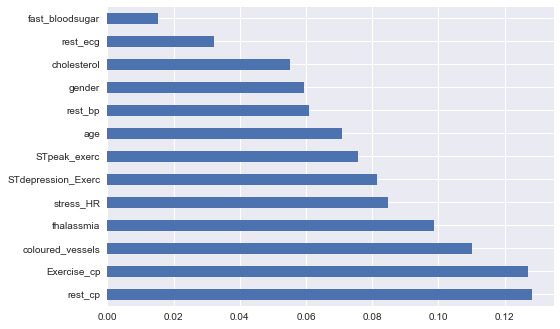

In [71]:
from sklearn.ensemble import ExtraTreesClassifier

et= ExtraTreesClassifier()
et.fit(x_train, y_train)

print(et.feature_importances_)

# Plot feature importance
feature_imp= pd.Series(et.feature_importances_, index=x.columns)
feature_imp.nlargest(13).plot(kind='barh')
plt.show()

In [72]:
y_pred_et_train=et.predict(x_train)
y_pred_et_test=et.predict(x_test)

print('Train accuracy', accuracy_score(y_train, y_pred_et_train))
print('Test accuracy', accuracy_score(y_test, y_pred_et_test))

Train accuracy 1.0
Test accuracy 0.9902597402597403


In [73]:
# Confusion matrix
et_conf_mat= confusion_matrix(y_test, y_pred_et_test)
print(et_conf_mat)

[[144   3]
 [  0 161]]


In [74]:
# Classification report
print('Classification report for ET model on Training data')
print(classification_report(y_train, y_pred_et_train))

print('...................................................')

print('Classification report for ET model on Training data')
print(classification_report(y_test, y_pred_et_test))

Classification report for ET model on Training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       352
           1       1.00      1.00      1.00       365

    accuracy                           1.00       717
   macro avg       1.00      1.00      1.00       717
weighted avg       1.00      1.00      1.00       717

...................................................
Classification report for ET model on Training data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       147
           1       0.98      1.00      0.99       161

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



# 9) Naive Bayes Model (Gaussian )

In [75]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train, y_train)

y_pred_gnb_train=gnb.predict(x_train)
y_pred_gnb_test=gnb.predict(x_test)

print('Train accuracy', accuracy_score(y_train, y_pred_gnb_train))
print('Test accuracy', accuracy_score(y_test, y_pred_gnb_test))

Train accuracy 0.8368200836820083
Test accuracy 0.7564935064935064


In [76]:
# Confusion matrix
gnb_conf_mat= confusion_matrix(y_test, y_pred_gnb_test)
print(et_conf_mat)

[[144   3]
 [  0 161]]


In [77]:
# Classification report
print('Classification report for GNB model on Training data')
print(classification_report(y_train, y_pred_gnb_train))

print('...................................................')

print('Classification report for GNB model on Training data')
print(classification_report(y_test, y_pred_gnb_test))

Classification report for GNB model on Training data
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       352
           1       0.82      0.87      0.84       365

    accuracy                           0.84       717
   macro avg       0.84      0.84      0.84       717
weighted avg       0.84      0.84      0.84       717

...................................................
Classification report for GNB model on Training data
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       147
           1       0.76      0.79      0.77       161

    accuracy                           0.76       308
   macro avg       0.76      0.75      0.76       308
weighted avg       0.76      0.76      0.76       308



# 10) ADABOOST

Base: DT

In [78]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ab= AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=1), n_estimators=100)

ab.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100)

In [79]:
print('Train', ab.score(x_train, y_train))
print('Test', ab.score(x_test, y_test))

Train 0.9581589958158996
Test 0.8701298701298701


# 11) ADABOOST

Base: RF

In [80]:
ab_rf= AdaBoostClassifier(RandomForestClassifier(n_estimators=20, max_depth=2), n_estimators=100)

ab_rf.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=2,
                                                         n_estimators=20),
                   n_estimators=100)

In [81]:
print('Train', ab_rf.score(x_train, y_train))
print('Test', ab_rf.score(x_test, y_test))

Train 1.0
Test 0.974025974025974


# 12) Gradient Boosting

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error as MSE

In [83]:
SEED=2
gbt= GradientBoostingClassifier(n_estimators=25, max_depth=1, random_state=SEED)

gbt.fit(x_train, y_train)

y_pred_gbt_train=gbt.predict(x_train)
y_pred_gbt_test=gbt.predict(x_test)

rmse_test= MSE(y_test, y_pred_gbt_test)**(0.5)

print('RMSE test {:.2f}'. format(rmse_test))

RMSE test 0.41


In [84]:
print(gbt.score(x_train, y_train))
print(gbt.score(x_test, y_test))

0.8702928870292888
0.8311688311688312


In [85]:
test_score= np.zeros(30, dtype= np.float64)
train_score= np.zeros(30, dtype= np.float64)

for i,Y_pred in enumerate(gbt.staged_predict(x_train)):
    train_score[i]= gbt.loss_(y_train, y_pred_gbt_train)
    
for i,Y_pred in enumerate(gbt.staged_predict(x_test)):
    test_score[i]= gbt.loss_(y_test, y_pred_gbt_test)

Text(0, 0.5, 'Least Sqaured Loss')

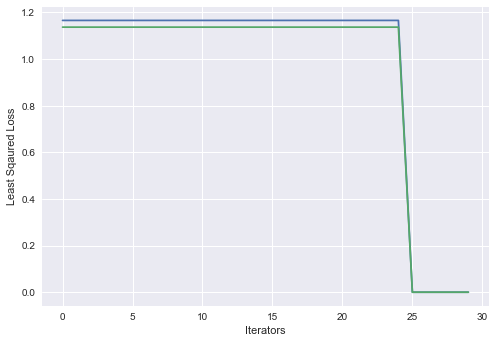

In [86]:
plt.plot(test_score)
plt.plot(train_score)
plt.xlabel('Iterators')
plt.ylabel('Least Sqaured Loss')

In [87]:
def log_loss_prime(y_test, y_pred_gbt_test):
    return ((1-y_test)/(1-y_pred_gbt_test)-y_test/y_pred_gbt_test)/np.size(y_test)

In [88]:
print(log_loss_prime(y_test, y_pred_gbt_test))

172    NaN
374    NaN
951    NaN
3      NaN
557    NaN
      ... 
221    NaN
983   -inf
469    NaN
38    -inf
86     NaN
Name: heart_disease, Length: 308, dtype: float64


In [89]:
from sklearn.metrics import log_loss
LogLoss= log_loss(y_test, y_pred_gbt_test, eps=1e-15, 
                 normalize=True, sample_weight=None, labels=None)

In [90]:
LogLoss

5.831302467713284

In [91]:
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred_gbt_test)
MSE

0.16883116883116883

# 13) XG BOOST

In [92]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [93]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
scores= cross_val_score(XGBClassifier(objective='reg:squarederror'), x_test, y_test)
scores

array([0.9516129 , 0.87096774, 0.83870968, 0.85245902, 0.86885246])

In [94]:
# rmse
rmse_score= (scores)**0.5
rmse_score

array([0.97550649, 0.93325653, 0.91581094, 0.92328707, 0.93212256])